# Data Wrangling Project Check-In
## Sylvia Jerden 4/27

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [7]:
cars_df = pd.read_csv("sjerden_integrated_data_proposal.csv")
cars_df.head()

,Unnamed: 0.2,Unnamed: 0,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,clean_title,price,mileage,accident,Unnamed: 0.1,Drivetrain,MPG,VIN
0,0,0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,Yes,10300,51000,True,NaN,NaN,NaN,NaN
1,1,1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,Yes,38005,34742,True,NaN,NaN,NaN,NaN
2,2,2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,NaN,54598,22372,False,NaN,NaN,NaN,NaN
3,3,3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,Yes,15500,88900,False,NaN,NaN,NaN,NaN
4,4,4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,NaN,34999,9835,False,NaN,NaN,NaN,NaN


In [8]:
cars_df.drop(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [9]:
cars_df.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,clean_title,price,mileage,accident,Drivetrain,MPG,VIN
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,Yes,10300,51000,True,NaN,NaN,NaN
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,Yes,38005,34742,True,NaN,NaN,NaN
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,NaN,54598,22372,False,NaN,NaN,NaN
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,Yes,15500,88900,False,NaN,NaN,NaN
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,NaN,34999,9835,False,NaN,NaN,NaN


In [12]:
pd.options.display.float_format = '{:,.0f}'.format
descriptive = cars_df['price'].describe()
descriptive

count       4,012
mean       44,555
std        78,682
min         2,000
25%        17,200
50%        31,000
75%        49,991
max     2,954,083
Name: price, dtype: float64

## Correlation tests

In [15]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(cars_df["mileage"], cars_df["price"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Pearson Correlation Coefficient: -0.3055
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


In [19]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(cars_df["model_year"], cars_df["price"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Pearson Correlation Coefficient: 0.1994
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


## Scatter plots based on data used in correlation tests

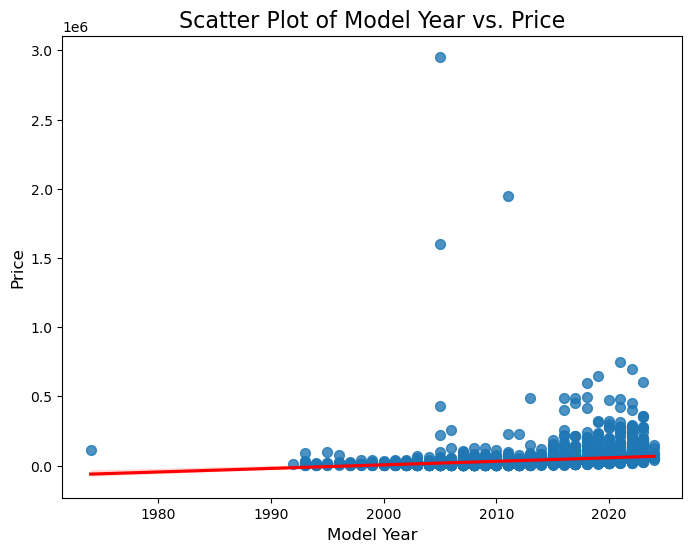

In [22]:
# create the scatter plot with a regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    x="model_year", 
    y="price", 
    data=cars_df, 
    scatter_kws={"s": 50},  # adjust size of scatter points
    line_kws={"color": "red"},  # set line color
)

# add axis labels and title
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Scatter Plot of Model Year vs. Price", fontsize=16)

# display the plot
plt.show()

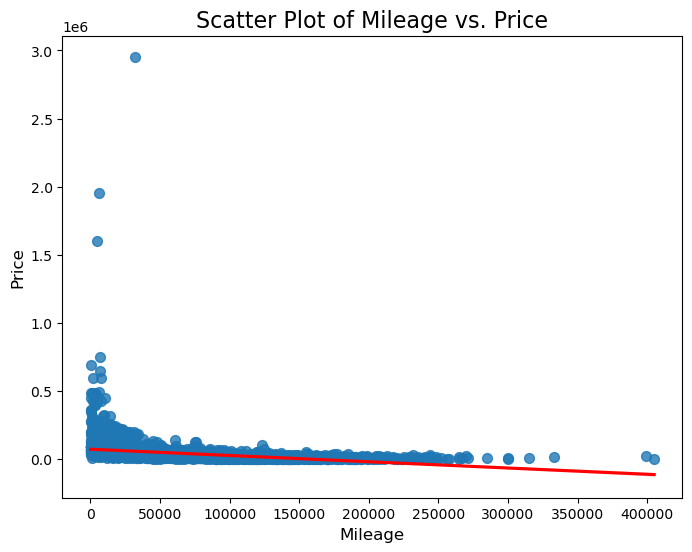

In [23]:
# create the scatter plot with a regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    x="mileage", 
    y="price", 
    data=cars_df, 
    scatter_kws={"s": 50},  # adjust size of scatter points
    line_kws={"color": "red"},  # set line color
)

# add axis labels and title
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Scatter Plot of Mileage vs. Price", fontsize=16)

# display the plot
plt.show()

## Average prices based on several variables

In [28]:
average_prices = cars_df.groupby('brand')['price'].mean()
average_prices.sort_values(ascending=True)

brand
smart               5,000
Suzuki              6,900
Scion               8,832
Saab               10,225
Saturn             12,379
Pontiac            13,573
Chrysler           13,813
MINI               14,158
Mercury            14,233
FIAT               14,800
Mitsubishi         17,551
Hyundai            18,947
Hummer             19,618
Mazda              20,279
Buick              20,358
Subaru             21,495
Honda              21,959
Volkswagen         22,068
INFINITI           22,928
Nissan             25,905
Volvo              26,444
Acura              28,034
Kia                28,096
Lincoln            28,331
Plymouth           28,500
Toyota             30,162
Jeep               31,100
Jaguar             32,363
Dodge              34,501
Lexus              35,669
Polestar           35,999
Ford               36,241
Chevrolet          36,723
GMC                37,526
Alfa               37,686
Audi               39,907
BMW                41,072
Cadillac           41,671
RAM   

In [30]:
average_prices_year = cars_df.groupby('model_year')['price'].mean()
average_prices_year.sort_values(ascending=True)

model_year
1994     7,540
1992    11,500
1997    11,611
1999    12,085
1998    12,671
2000    13,003
2004    13,792
2002    14,241
2001    14,755
2003    16,463
2008    18,649
2010    18,707
2007    18,716
2012    19,337
2009    21,414
1996    22,437
1993    22,522
2006    22,743
2014    24,069
1995    25,665
2013    26,575
2015    30,572
2011    35,029
2016    36,539
2017    40,555
2019    50,307
2018    50,670
2020    58,278
2021    65,237
2022    68,012
2024    80,510
2023    86,093
2005    87,681
1974   115,000
Name: price, dtype: float64

In [36]:
average_accident = cars_df.groupby('accident')['price'].mean()
average_accident.sort_values(ascending=True)

accident
True    28,832
False   49,638
Name: price, dtype: float64

In [ ]:
average_accident = cars_df.groupby('accident')['price'].mean()
average_accident.sort_values(ascending=True)

## Machine learning correlation test

In [40]:
# Statistics for Two Continuous Variables
# Correlation
correlation = cars_df['model_year'].corr(cars_df['mileage'])
print("Correlation between model year and mileage:", correlation)

Correlation between model year and mileage: -0.6180188269494342
